
# READ DATASET

In [52]:
import seaborn as sb
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
!pip install transformers
from sklearn.linear_model import LogisticRegression
from transformers import pipeline
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
# Pipelines
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.compose import ColumnTransformer

# Machine Learning
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
# Transformers
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import time
# confusion matrix in sklearn
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [53]:
train_data=pd.read_csv("train.csv").reset_index()
test_data= pd.read_csv("test.csv").reset_index()  
train_copy=train_data.copy()

In [54]:
train_data.head(3)

,index,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,0,842,0,2.2,0,1,0,7,0.6,188,...,20,756,2549,9,7,19,0,0,1,1
1,1,1021,1,0.5,1,0,1,53,0.7,136,...,905,1988,2631,17,3,7,1,1,0,2
2,2,563,1,0.5,1,2,1,41,0.9,145,...,1263,1716,2603,11,2,9,1,1,0,2


In [55]:
test_data.head(3)

,index,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,...,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,0,1,1043,1,1.8,1,14,0,5,0.1,...,16,226,1412,3476,12,7,2,0,1,0
1,1,2,841,1,0.5,1,4,1,61,0.8,...,12,746,857,3895,6,0,7,1,0,0
2,2,3,1807,1,2.8,0,1,0,27,0.9,...,4,1270,1366,2396,17,10,10,0,1,1


In [56]:
print("The dataset name :mobile price, train.csv ")
print("# of features in dataset: ", len(train_data.columns))
print("# of records in train dataset: ", len(train_data))
print("# of records in test dataset: ", len(test_data))


The dataset name :mobile price, train.csv 
# of features in dataset:  22
# of records in train dataset:  2000
# of records in test dataset:  1000


**Classification into 2 classes: expensive and cheap**

In [57]:
s_time = time.time()
from scipy.special.orthogonal import roots_hermitenorm

def label_classify(price):
    if price > 1.5 :
        x = 1
        return 1     
    elif price <1.5 :
        return 0     

train_data['price_range'] = train_data['price_range'].apply(label_classify)
print(train_data['price_range'])
print(f'run time : {time.time() - s_time}')

0       0
1       1
2       1
3       1
4       0
       ..
1995    0
1996    1
1997    1
1998    0
1999    1
Name: price_range, Length: 2000, dtype: int64
run time : 0.030340194702148438


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


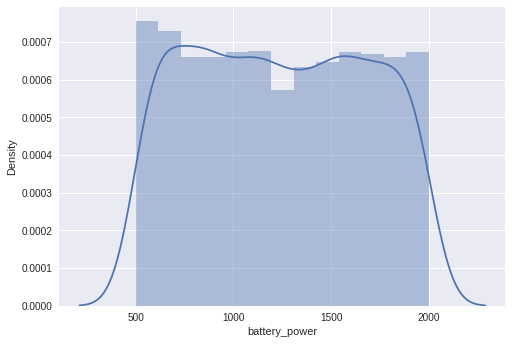

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


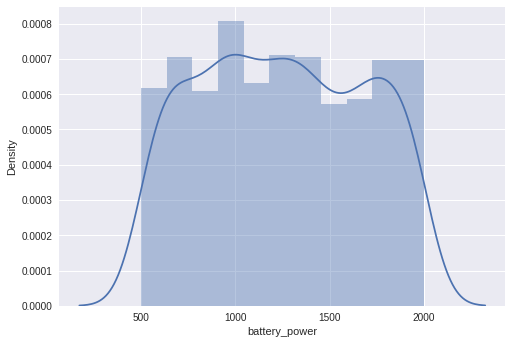

In [58]:
import seaborn as sns   
sns.distplot(train_data['battery_power'])    
plt.show()
import seaborn as sns   
sns.distplot(test_data['battery_power'])    
plt.show()

# Preprocessing data

**Checking the missing data**

In [59]:
print("number of null values in each column of train:")
print(train_data.isna().sum() )

number of null values in each column of train:
index            0
battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64


**Delete duplicates**

In [60]:
train_data=train_data.drop_duplicates() 
print("New train data len:", len(train_data))

New train data len: 2000


**Dataset distribution plot before deleting outlier data**

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


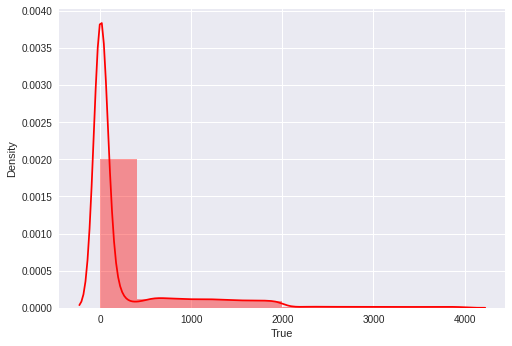

In [61]:

import seaborn as sns
sns.distplot(train_data,bins=10, hist=True, kde=True,color='red', vertical=False,
             norm_hist=False, axlabel=True, label='data outlier', ax=None, x=None)    
plt.show()

**Min Max normalization**

In [62]:
for cols in train_data.columns:
   if (train_data[cols].dtypes == 'int64' or train_data[cols].dtypes == 'float64'):
       train_data[cols]=(train_data[cols]-train_data[cols].mean())/train_data[cols].std()

In [63]:
# Delete all Outlier 

In [64]:
for cols in train_data.columns:
   if (train_data[cols].dtypes == 'int64' or train_data[cols].dtypes == 'float64'):
       upper_range=(train_data[cols].mean()+3 )* train_data[cols].std()
       lower_range=(train_data[cols].mean()-3 )* train_data[cols].std()
       indexes=train_data[(train_data[cols]>upper_range)|(train_data[cols]< lower_range)].index
       train_data=train_data.drop(indexes)

In [65]:
print("# of records in train dataset: ", len(train_data))

# of records in train dataset:  1988


# Feature selection using Feed Forward method

In [66]:
X = train_data.drop(['price_range'], axis=1)
y = train_data['price_range']
y = LabelEncoder().fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=22,stratify=y, shuffle=True)

print("shape X_train:",X_train.shape)
print("shape X_test:",X_test.shape)
print("shape y_train:",y_train.shape)
print("shape y_test:",y_test.shape)

shape X_train: (1391, 21)
shape X_test: (597, 21)
shape y_train: (1391,)
shape y_test: (597,)


**Logistic regression on all features**

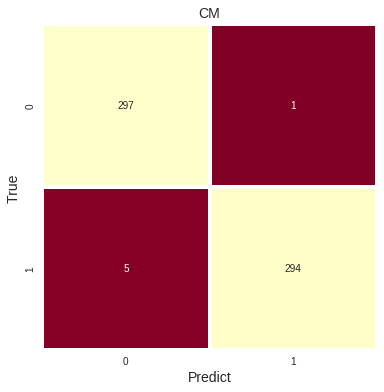

Classification report : 
               precision    recall  f1-score   support

           1       1.00      0.98      0.99       299
           0       0.98      1.00      0.99       298

    accuracy                           0.99       597
   macro avg       0.99      0.99      0.99       597
weighted avg       0.99      0.99      0.99       597



In [67]:
X_train_all = pd.DataFrame(data=X_train, columns=X_train.columns)
X_test_all = pd.DataFrame(data=X_test, columns=X_test.columns)
pipe = make_pipeline(StandardScaler(), LogisticRegression(n_jobs=1, penalty='l2'))
pipe.fit(X_train_all, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),('logisticregression', LogisticRegression())])

actual = y_test
Logre = LogisticRegression()
Logre.fit(X_train_all, y_train)

predicted = Logre.predict(X_test_all)
cm = confusion_matrix(actual, predicted)
df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= cm )

f,ax = plt.subplots(figsize=(6,6))
sns.heatmap(df1, annot=True, fmt= '.00f',ax=ax,linewidths = 3, cbar = False,cmap='YlOrRd_r')
plt.xlabel("Predict", size = 14)
plt.ylabel("True ", size = 14)
plt.title("CM", size = 14)
plt.show()
matrix = classification_report(actual,predicted,labels=[1,0])
print('Classification report : \n',matrix)


**All features confusion matrix**

**Forward Feature Selection by AUC**

In [68]:
def ForwardFeatureSelect(X_train, y_train,n):

    initial_features = train_data.columns.tolist()
    best_features = []
    init_auc = 0.55

    # train models
    from sklearn.linear_model import LogisticRegression

    # logistic regression
    model1 = LogisticRegression()

    from prettytable import PrettyTable as pt
    tb = pt()
    tb.field_names = ["index","column","auc_score1 (LR)"]
    tb.align='l'
    tb.align["index"] = "c"
    tb.title='selected features based on AUC through forward selection'
    i=0

    for new_feature in initial_features:

        best_features.append(new_feature)
        X_train_f = pd.DataFrame(data=X_train, columns=best_features)
        X_test_f = pd.DataFrame(data=X_test, columns=best_features)

        # fit model
        model1.fit(X_train_f, y_train)

        # predict probabilities
        pred_prob1 = model1.predict_proba(X_test_f)

        from sklearn.metrics import roc_curve

        # roc curve for models
        fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)

        # roc curve for tpr = fpr 
        random_probs = [0 for i in range(len(y_test))]
        p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)


        from sklearn.metrics import roc_auc_score

        # auc scores
        auc_score1 = roc_auc_score(y_test, pred_prob1[:,1])

        if  auc_score1 > init_auc :
            init_auc =  auc_score1
            tb.add_row([i+1,new_feature,  auc_score1])
        else:
          best_features.pop()
        if len(best_features) == n:
          break 
        i=i+1
    print(tb)

    return best_features

In [69]:
best_features=ForwardFeatureSelect(X,y,6)

+----------------------------------------------------------+
| selected features based on AUC through forward selection |
+---------+--------------------+---------------------------+
|  index  | column             | auc_score1 (LR)           |
+---------+--------------------+---------------------------+
|    2    | battery_power      | 0.6129323696437791        |
|    4    | clock_speed        | 0.6133083432470652        |
|    5    | dual_sim           | 0.6163666359902135        |
|    6    | fc                 | 0.6179995959686652        |
|    9    | m_dep              | 0.6222419249848488        |
|    10   | mobile_wt          | 0.6240825121770555        |
+---------+--------------------+---------------------------+


**logistic regression on best selected features**

In [70]:
# train models
from sklearn.linear_model import LogisticRegression


X_train_features = pd.DataFrame(data=X_train, columns=best_features)
X_test_features = pd.DataFrame(data=X_test, columns=best_features)
Reg = LogisticRegression()
Reg.fit(X_train_features, y_train)
pred_prob_features_1 = Reg.predict_proba(X_test_features)
from sklearn.metrics import roc_curve
random_probs = [0 for i in range(len(y_test))]
from sklearn.metrics import roc_auc_score
auc_score1 = roc_auc_score(y_test, pred_prob_features_1[:,1])
print('auc score (logistic regression):',auc_score1)

auc score (logistic regression): 0.6137123745819398


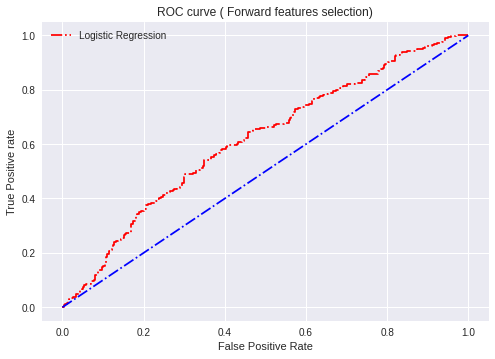

In [71]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob_features_1[:,1], pos_label=1)

p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)
plt.plot(fpr1, tpr1, linestyle='-.',color='red', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='-.', color='blue')
# title
plt.title('ROC curve ( Forward features selection)')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();

**Logistic regression on best selected features (using pipeline)**

In [72]:
X_train1 = pd.DataFrame(data=X_train, columns=best_features)
X_test1 = pd.DataFrame(data=X_test, columns=best_features)

pipe = make_pipeline(StandardScaler(), LogisticRegression())
pipe.fit(X_train1, y_train)  # apply scaling on training data
Pipeline(steps=[('standardscaler', StandardScaler()),('logisticregression', LogisticRegression())])

pipe.score(X_test1, y_test) 

0.5896147403685092

No Skill: ROC AUC=0.50000
Logistic: ROC AUC=0.61371


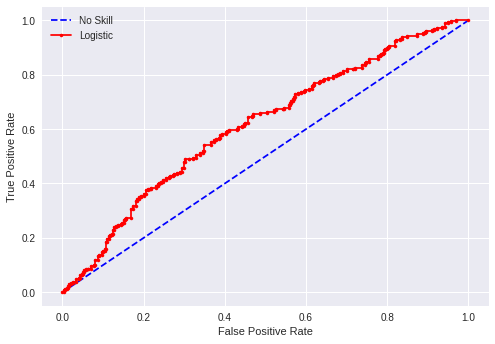

In [73]:

ns_probs = [0 for _ in range(len(y_test))]

model = LogisticRegression(solver='lbfgs')
model.fit(X_train1, y_train)

lr_probs = model.predict_proba(X_test1)  # predict probabilities

lr_probs = lr_probs[:, 1]  
ns_auc = roc_auc_score(y_test, ns_probs)  # calculate scores
lr_auc = roc_auc_score(y_test, lr_probs)

# summarize scores
print('No Skill: ROC AUC=%.5f' % (ns_auc))
print('Logistic: ROC AUC=%.5f' % (lr_auc))

# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)   # fpr=false positive rates 
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)   # tpr=true positive rates

# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--',color='blue', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.',color='red', label='Logistic')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')

# show the legend
pyplot.legend()
# show the plot
pyplot.show()

# PCA
Principal Component Analysis

In [74]:
data=pd.read_csv("train.csv").reset_index()  #reading dataset
data.shape

(2000, 22)

we devide our features into Categorical and numerical features

In [75]:
cat_vals = ["blue", "dual_sim", "four_g", "wifi", "touch_screen", "three_g"]
num_vals = ["battery_power", "clock_speed", "fc", "int_memory", "m_dep", "mobile_wt",
            "n_cores", "pc", "px_height", "px_width", "ram",
            'sc_h', 'sc_w', 'talk_time'
           ]
# We verify if we included all the features
print(len(cat_vals) + len(num_vals) == data.shape[1] - 2)

True


In [76]:
# features
X = data[data.columns[1:-1]]
# target
Y = data[["price_range"]]

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


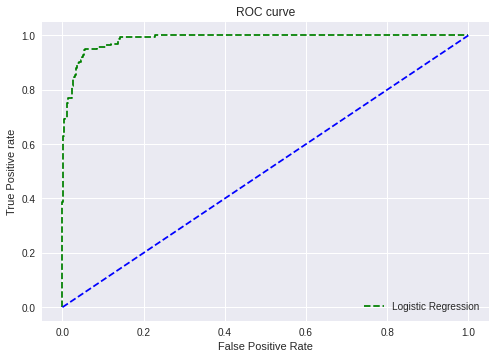

[[148  13   0   0]
 [ 20 144   1   0]
 [  0   4 144  17]
 [  0   0  15 154]]
------------------------------------------------------------------
Confusion matrix : 
 [[144  20]
 [ 13 148]]
------------------------------------------------------------------


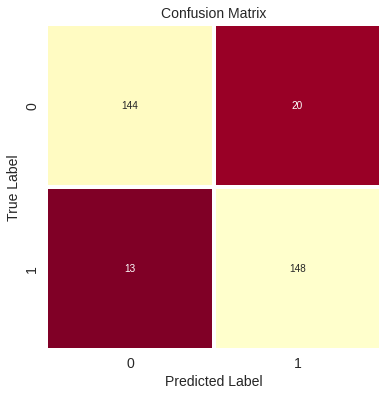

Classification report : 
               precision    recall  f1-score   support

           1       0.89      0.87      0.88       165
           0       0.88      0.92      0.90       161

   micro avg       0.89      0.90      0.89       326
   macro avg       0.89      0.90      0.89       326
weighted avg       0.89      0.90      0.89       326



In [77]:
# Categorical features
X_cat = X[cat_vals]
# Numerical features
X_num = X[num_vals]
pca = PCA(n_components=4)
X_transf= pca.fit_transform(X_num)
data["X_PCA1"] = X_transf[:, 0]
data["X_PCA2"] = X_transf[:, 1]
data["X_PCA3"] = X_transf[:, 2]
data["X_PCA4"] = X_transf[:, 3]
# feature is now made of the four components of the PCA and the categorical values
features = ["X_PCA1", "X_PCA2", "X_PCA3", "X_PCA4"] + cat_vals
X_training = data[features]
X_training.head()
X_train, X_test, y_train, y_test = train_test_split(X_training, Y, test_size=0.33)
actual = y_test
y_train_fit = y_train.to_numpy().ravel()
from sklearn.linear_model import LogisticRegression

# logistic regression
LR = LogisticRegression()

# fit model
LR.fit(X_train, y_train_fit)
# train models

# predict probabilities
pred_prob1 = LR.predict_proba(X_test)

from sklearn.metrics import roc_curve

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label=1)


# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

# matplotlib
import matplotlib.pyplot as plt
plt.style.use('seaborn')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle='--',color='green', label='Logistic Regression')
plt.plot(p_fpr, p_tpr, linestyle='--', color='blue')
# title
plt.title('ROC curve')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig('ROC',dpi=300)
plt.show();
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
import seaborn as sns
# confusion matrix
y_pred = LR.predict(X_test)
print(confusion_matrix(y_test, y_pred))
# confusion matrix
matrix = confusion_matrix(actual,y_pred, labels=[1,0])
print("------------------------------------------------------------------")
print('Confusion matrix : \n',matrix)
print("------------------------------------------------------------------")
# outcome values order in sklearn
tp, fn, fp, tn = confusion_matrix(actual,y_pred,labels=[1,0]).reshape(-1)

df1 = pd.DataFrame(columns=["0","1"], index= ["0","1"], data= matrix )

f,ax = plt.subplots(figsize=(6,6))

sns.heatmap(df1, annot=True, fmt= '.0f',ax=ax,linewidths = 3, cbar = False,cmap='YlOrRd_r')
plt.xlabel("Predicted Label", size = 14)
plt.xticks(size = 14)
plt.yticks(size = 14, rotation = 90)
plt.ylabel("True Label", size = 14)
plt.title("Confusion Matrix", size = 14)
plt.show()

# classification report for precision, recall f1-score and accuracy
matrix = classification_report(actual,y_pred,labels=[1,0])
print('Classification report : \n',matrix)


# Feature engineering

## **1.Binning**

In [78]:
def create_equal_bins(n):
    
    bins=[]
    a=dftrain.battery_power.min()
    b=dftrain.battery_power.max()
    width=(b-a)/n   
    for i in range(n+1):
      bins.append((a+i*width))  
    print("Bins:")

    return  bins

In [79]:
def create_unequal_bins(dftrain):
    import random
    n=random.randint(1,4)
    bins=[]
    a=dftrain.battery_power.min()
    b=dftrain.battery_power.max()
    width=(b-a)/n
    bins.append(a)
    bins.append((a+width/5)) 
    bins.append((a+width/3))
    bins.append((b-width)/2)
    bins.append((b-width/3))
    bins.append(b)

    print("Bins:")
    return  sorted(bins)

now we create unequal bins :

In [80]:
def value_counter(dftrain,bins): 
  #bin_labels=pd.DatFrame()
  bin_labels = pd.DataFrame(columns = ['value', 'label'])
  
  # append rows to an empty DataFrame

  data=[]
  for value in dftrain.battery_power:
      data.append(value)
      for i in range(0,len(bins)-1):
          if bins[i] <= value < bins[i+1]:
             bin_labels=bin_labels.append({'value' : value, 'label' : i+1}, 
                ignore_index = True)
             

  occur = bin_labels.groupby(['label']).size()
  
  import matplotlib.pyplot as plt
    
  plt.size=(5,5)
  plt.hist(data, bins= bins,edgecolor="yellow", color="blue")
    
  plt.show()

  return display(occur)

In [ ]:
bin_index = create_equal_bins(6)  
print('bins:',bin_index)
value_counter(dftrain,bin_index)

In [ ]:
bin_index = create_unequal_bins(dftrain)  
print('bins:',bin_index)
value_counter(dftrain,bin_index)

## **2.Onehot encoding**

In [82]:
import pandas as pd


train_data=pd.read_csv("train.csv")  #reading dataset
test_data = pd.read_csv("test.csv")  #reading dataset

train_data.dropna(axis=0, subset=['price_range'], inplace=True)
target = train_data.price_range

# Drop data where the target is missing
cols_with_missing = [col for col in train_data.columns  if train_data[col].isnull().any()]                                  
candidate_train_predictors = train_data.drop(['price_range'] + cols_with_missing, axis=1)
candidate_test_predictors = test_data.drop(['id'] + cols_with_missing, axis=1)


low_cardinality_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].nunique() < 10 and
                                candidate_train_predictors[cname].dtype == "object"]
numeric_cols = [cname for cname in candidate_train_predictors.columns if 
                                candidate_train_predictors[cname].dtype in ['int64', 'float64']]
my_cols = low_cardinality_cols + numeric_cols
train_predictors = candidate_train_predictors[my_cols]
test_predictors = candidate_test_predictors[my_cols]

In [83]:
train_predictors = candidate_train_predictors[my_cols]
test_predictors = candidate_test_predictors[my_cols]

In [84]:
train_predictors.dtypes.sample(10)

sc_w               int64
battery_power      int64
clock_speed      float64
m_dep            float64
px_height          int64
n_cores            int64
four_g             int64
wifi               int64
blue               int64
mobile_wt          int64
dtype: object

In [85]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)

In [86]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

def get_mae(X, y):
    # multiple by -1 to make positive MAE score instead of neg value returned as sklearn convention
    return -1 * cross_val_score(RandomForestRegressor(50), 
                                X, y, 
                                scoring = 'neg_mean_absolute_error').mean()

predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])

mae_without_categoricals = get_mae(predictors_without_categoricals, target)

mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)

print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))

Mean Absolute Error when Dropping Categoricals: 0
Mean Abslute Error with One-Hot Encoding: 0


Applying to Multiple Files

In [87]:
one_hot_encoded_training_predictors = pd.get_dummies(train_predictors)
one_hot_encoded_test_predictors = pd.get_dummies(test_predictors)
final_train, final_test = one_hot_encoded_training_predictors.align(one_hot_encoded_test_predictors,
                                                                    join='left', 
                                                                    axis=1)

In [88]:
predictors_without_categoricals = train_predictors.select_dtypes(exclude=['object'])

mae_without_categoricals = get_mae(predictors_without_categoricals, target)
mae_one_hot_encoded = get_mae(one_hot_encoded_training_predictors, target)

print('Mean Absolute Error when Dropping Categoricals: ' + str(int(mae_without_categoricals)))
print('Mean Abslute Error with One-Hot Encoding: ' + str(int(mae_one_hot_encoded)))

Mean Absolute Error when Dropping Categoricals: 0
Mean Abslute Error with One-Hot Encoding: 0


# decision tree

In [89]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 


In [90]:
X = train_data.drop(['price_range'], axis=1)
y = train_data['price_range']
y = LabelEncoder().fit_transform(y)

print(X.shape)
print(y.shape)

(2000, 20)
(2000,)


In [91]:
col_names=['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi','Area']

In [92]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

 Performing The decision tree analysis using scikit learn

In [93]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.85
